# Assignment-3

## Problem 1
Modify the second program to allow for the sum of reciprocals. For example, when given
a list of numbers 1,2,3,4, 5 then the sum would be 1/1 + 1/2 + 1/3 + 1/4 + 1/5 = 2.283.
When adding this function, add it locally and use the other sum function and use an inline
lambda function that maps x to 1/x. You can assume zero is never in the list.

In [19]:
def f(*x,**y):
    def s1(x):
        s=0
        if x:
            for i in x:
                s+=i
        return s
    
    def p1(x):
        p=1
        if x:
            for i in x:
                p*=i
        return p

    
    def sum_of_reciprocal(x):
        sum=0
        if x:
            sum=s1(list(map(lambda i:(1/int(i)),x)))
        return sum



    if y["action"]=="sum":
        return s1(*x)
    elif y["action"]=="product":
        return p1(*x)
    elif y["action"]=="reciprocal sum":
        return sum_of_reciprocal(*x)
    else:
        return f"bad argument: {y}"

if __name__ == '__main__':
     xlst = [1,2,3,4,5]

     print("Sum of numbers in x =",f(xlst, action = "sum"))
     print("Product of numbers in x =",f(xlst, action = "product"))
     print("Sum of reciprocal of numbers in x=",f(xlst, action = "reciprocal sum"))


Sum of numbers in x = 15
Product of numbers in x = 120
Sum of reciprocal of numbers in x= 2.283333333333333


## Output:
Sum of numbers in x = 15 

Product of numbers in x = 120 

Sum of reciprocal of numbers in x= 2.283333333333333

### Execution
On executing this program, for list of numbers in x [1,2,3,4,5] reciprocal is [1/1,1/2,1/3,1/4,1/5] We calculate the sum of the reciprocal list.


## Implementation:

The function f takes input (* x and ** y) where * x represents the numbers in the list and ** y is a dictionary which takes key as action of operations such as sum, product, reciprocal sum etc.We define
1. function sum_of_reciprocal- sum of reciprocal of numbers in list x

__Sum_of_reciprocal(x)__:
Input: list of numbers in x
Output: sum of reciprocal using inline lambda function

The lambda function converts the numbers in the list x to its reciprocal value and stores it as a list using Map.
The map function takes the input 
1. lambda function (x:1/x)
2. list x

We call the s1()-sum fuction on the list to compute sum of reciprocal numbers and return the sum.

**Points to note:**
* We have casted the string numbers in list to integers.`(1/int(i))`


## Problem 2

Using how to read in console information in problem 2, modify the first program so that it can be executed from the console using a list of numbers and the operation. You should not modify the original function–simply add script to read in data from the console.

In [26]:
import argparse


def f(*x,**y):
    def s1(x):
        s=0
        if x:
            for i in x:
                s+=i
        return s
    
    def p1(x):
        p=1
        if x:
            for i in x:
                p*=i
        return p

    if y["action"]=="sum":
        return s1(*x)
    elif y["action"]=="product":
        return p1(*x)
    else:
        return f"bad argument: {y}"

if __name__=='__main__':
    parser=argparse.ArgumentParser()
    parser.add_argument('-lst', nargs='*', default = [],type=int, help="List of numbers")
    parser.add_argument('-op' ,default='sum', help="sum prod etc")
    args=parser.parse_args()
    A=args.lst
    print(f(A, action=args.op))


usage: ipykernel_launcher.py [-h] [-lst [LST ...]] [-op OP]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/keerthanarenu/.local/share/jupyter/runtime/kernel-198f33ef-f191-4b47-8686-7aa3b65f8bee.json


SystemExit: 2

## Problem 3

Add multiplication to the Python class overload asterisk.


In [2]:
import time

class complex_:
    def __init__(self, re=0,im=0):
        self.re=re
        self.im=im
        
    def get_re(self):
        return self.re
    
    def get_im(self):
        return self.im
    
    def __str__(self):
        g=lambda x:"+" if x>=0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)" 
    
    def cadd(self, other):
        new_re=self.get_re()+other.get_re()
        new_im=self.get_im()+other.get_im()
        return complex_(new_re,new_im)
    
    def __add__(self,other):
        new_re= self.get_re()+other.get_re()
        new_im=self.get_im()+other.get_im()
        return complex_(new_re,new_im)

    def cmul(self,other):
        new_re = ((self.get_re()*other.get_re())-(self.get_im()*other.get_im()))
        new_im = ((self.get_re()*other.get_im())+(self.get_im()*other.get_re()))
        return complex_(new_re,new_im)
#  multiplication of complex numbers (a+bi)(c+di)=(ac-bd)+(ad+bc)i
#  overiding * operator
    def __mul__(self,other):
        new_re = ((self.get_re()*other.get_re())-(self.get_im()*other.get_im()))
        new_im = ((self.get_re()*other.get_im())+(self.get_im()*other.get_re()))
        return complex_(new_re,new_im)

if __name__=='__main__':
    start_time=time.time()
    w=complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    
    print("w=",w)
    print("x=",x)
    print("y=",y)
    print("z=",z)
    
    #using function overload
    print("add(w,x,y,z)=",w.cadd(x).cadd(y).cadd(z))
    print("product(x,y,z)=",x.cmul(y).cmul(z))

    #operator overloading
    print("sum=", w+z)
    print("mul=",x*y*z)
    # print("total runtime=",round(float(time.time()-start_time),5))

w= (1-3i)
x= (-1+3i)
y= (1+3i)
z= (-1-3i)
add(w,x,y,z)= (0+0i)
product(x,y,z)= (10+30i)
sum= (0-6i)
mul= (10+30i)


## Problem 4

Perform an experimental analysis over the three algorithms, average1, average2, average3. In a log-log chart, visualize their running times as a function of the input size.

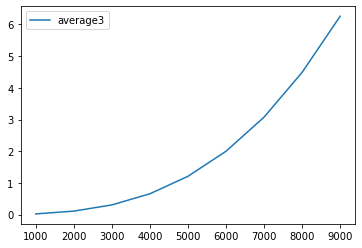

In [10]:
from timeit import default_timer
import matplotlib.pyplot as plt
import random as rn

def average1(S):
    n = len(S)
    my_average = [0]*n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1)
    return my_average

def average2(S):
    n = len(S)
    my_average= [0]*n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    n = len(S)
    my_average = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

n=[i for i in range(1000,10000,1000)]

start = default_timer()
final_time1=[]
final_time2=[]
final_time3=[]
for i in n:
    S = [rn.randint(1,100) for _ in range(i)]
    avg1 = average1(S)
    final_time1.append(default_timer()-start)
    avg2 = average2(S)
    final_time2.append(default_timer()-start)
    avg3 = average3(S)
    final_time3.append(default_timer()-start)
    
# plt.plot(n,final_time1, label = "average1")
# plt.plot(n,final_time2, label = "average2")
plt.plot(n,final_time3, label = "average3")
plt.legend()
 
# plt.loglog(n,final_time1, label = "average1")
# plt.loglog(n,final_time2, label = "average2")
# plt.loglog(n,final_time3, label = "average3")
# plt.legend()

## Problem 5

In this question, you will work with the three algorithms, algorithm1, algorithm2, algorithm3,
which check whether a given sequence is unique. Perform an experimental analysis to
determine the largest value of input size such that the given algorithm runs in less than 45
seconds.

input sizeof 1 15000
input sizeof 1 20000
input sizeof 1 25000
input sizeof 1 30000
input sizeof 1 35000
input sizeof 1 40000
input sizeof 1 45000
input sizeof 1 50000
algorithm1 run completed
input sizeof 2 10001000
input sizeof 2 20001000
input sizeof 2 30001000
input sizeof 2 40001000
input sizeof 2 50001000
input sizeof 2 60001000
input sizeof 2 70001000
input sizeof 2 80001000
input sizeof 2 90001000
input sizeof 2 100001000
input sizeof 2 110001000
algorithm2 run completed
input_size: 10
input sizeof 3 10 9.274482727050781e-05
input_size: 12
input sizeof 3 12 0.000335693359375
input_size: 14
input sizeof 3 14 0.0013408660888671875
input_size: 16
input sizeof 3 16 0.005566596984863281
input_size: 18
input sizeof 3 18 0.02377486228942871
input_size: 20
input sizeof 3 20 0.09447526931762695
input_size: 22
input sizeof 3 22 0.3743560314178467
input_size: 24
input sizeof 3 24 1.5077214241027832
input_size: 26
input sizeof 3 26 5.978050947189331
input_size: 28
input sizeof 3 28 24.6973

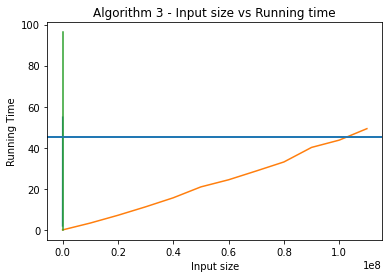

In [24]:
import random
import time
import sys
import matplotlib.pyplot as plt

sys.setrecursionlimit(50000)
def algorithm1(S):
    # print("length=",type(S))
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

def algorithm2(S):
#S:sequence
    S = sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

def algorithm3(S, start, stop):
#slice S[start:stop],
#S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

def generate_sequence(input_size):
    # input_size=10
    input_list=list(random.sample(range(0,input_size),input_size))
    # print("input_list=",input_list)
    random.shuffle(input_list)
    # print("shuffled list=",input_list)
    # print("length =",len(input_list))
    return input_list

def call_algorithm1(step_size):
    input_size=10000
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        start_time=time.time()
        output=algorithm1(input_list)
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
        print("input sizeof 1",input_size)
    print("algorithm1 run completed")
    plt.title("Algorithm 1 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)

def call_algorithm2(step_size):
    input_size=1000
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        start_time=time.time()
        output=algorithm2(input_list)
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
        print("input sizeof 2",input_size)
    print("algorithm2 run completed")
    plt.title("Algorithm 2 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)

def call_algorithm3(step_size):
    input_size=10
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        print("input_size: {}".format(input_size))
        if input_size == 30:
            input_list = [i for i in range(1,31)]
            random.shuffle(input_list)
            print(input_list)
        start_time=time.time()
        output=algorithm3(input_list,0,len(input_list))
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        print("input sizeof 3",input_size,(end_time-start_time))
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
    print("algorithm3 run completed")
    plt.title("Algorithm 3 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)

if __name__=="__main__":
    step_size1,time1=call_algorithm1(5000)
    step_size2,time2=call_algorithm2(10000000)
    step_size3,time3=call_algorithm3(2)

    print("===========Algorithm 1===========")
    print("Algorithm1 with input size ={}, runs in {} secs" .format(step_size1,time1))
    print("===========Algorithm 2===========")
    print("Algorithm2 with input size ={}, runs in {} secs".format(step_size2,time2))
    print("===========Algorithm 3===========")
    print("Algorithm3 with input size ={}, runs in {} secs".format(step_size3,time3))
